In [53]:
import os
import pandas as pd
import scipy.io as sio
import cv2
import numpy as np
from sklearn.metrics import jaccard_score
from sklearn.metrics import confusion_matrix


cols = ['sensitivity','specificity','accuracy','dice_score','Jaccard']
df = pd.DataFrame(columns=cols)
path_segment_out ="/media/beta/navchetan-beps/Lars_BEP/Test_outputs/MiniNet/Results_outer"
path_segment_in ="/media/beta/navchetan-beps/Lars_BEP/Test_outputs/MiniNet/Results_inner"
path_testing_ground_truth_out="/media/beta/navchetan-beps/Lars_BEP/Testing sets/Outer"
path_testing_ground_truth_in="/media/beta/navchetan-beps/Lars_BEP/Test sets/Inner"

N_TESTING_SAMPLES = 213
print('Loading Testing Data for computation of Jaccard Index')
sensitivity_t = 0
specificity_t = 0
accuracy_t = 0
dice_score_t = 0
Jaccard_t = 0
for i in range(N_TESTING_SAMPLES):
    if(i%10 == 0):
        print(i)
    os.chdir(path_segment_out)    
    pathr = 'Segment_Output'+str(i+1).zfill(5)+'.mat'
    x = sio.loadmat(pathr)
    Segment_model = x['S']
    Segment_model1 = Segment_model*255;
    retval1, Segment_model_threshold = cv2.threshold(Segment_model1,100,255,cv2.THRESH_BINARY)
    Segment_model_threshold_out = Segment_model_threshold/255.0
    
    os.chdir(path_segment_in)    
    pathr = 'Segment_Output'+str(i+1).zfill(5)+'.mat'
    x = sio.loadmat(pathr)
    Segment_model = x['S']
    Segment_model1 = Segment_model*255;
    retval1, Segment_model_threshold = cv2.threshold(Segment_model1,100,255,cv2.THRESH_BINARY)
    Segment_model_threshold_in = Segment_model_threshold/255.0
    
    Segment_model_threshold1=Segment_model_threshold_out-Segment_model_threshold_in
    for i in range(256):
        for j in range(256):
            if Segment_model_threshold1[i,j]<0:
                Segment_model_threshold1[i,j]=0
    os.chdir(path_testing_ground_truth_out)
    path_t = 'Segment'+str(i+1).zfill(5)+'.mat'
    y = sio.loadmat(path_t)
    ground_truth_testing  = y['S']
    ground_truth1 = ground_truth_testing*255;
    retval2, ground_truth_testing_threshold = cv2.threshold(ground_truth1,0,255,cv2.THRESH_BINARY)
    ground_truth_testing_threshold_out = ground_truth_testing_threshold/255.0
    
    os.chdir(path_testing_ground_truth_in)
    path_t = 'Segment'+str(i+1).zfill(5)+'.mat'
    y = sio.loadmat(path_t)
    ground_truth_testing  = y['S']
    ground_truth1 = ground_truth_testing*255;
    retval2, ground_truth_testing_threshold = cv2.threshold(ground_truth1,0,255,cv2.THRESH_BINARY)
    ground_truth_testing_threshold_in = ground_truth_testing_threshold/255.0
    
    ground_truth_testing_threshold1=ground_truth_testing_threshold_out-ground_truth_testing_threshold_in
    
    mcm = confusion_matrix(np.ndarray.flatten(Segment_model_threshold1),np.ndarray.flatten(ground_truth_testing_threshold1))
    tn = mcm[0, 0]
    fp = mcm[0, 1]
    fn = mcm[1, 0]
    tp = mcm[1, 1]
    
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    accuracy = (tp + tn) / (tp + tn + fn + fp)
    dice_score = 2*tp / (2*tp + fp + fn)
    Jaccard = dice_score / (2-dice_score)
    
    sensitivity_t = sensitivity_t + sensitivity
    specificity_t = specificity_t + specificity
    accuracy_t = accuracy_t + accuracy
    dice_score_t = dice_score_t + dice_score
    Jaccard_t = Jaccard_t + Jaccard
    
    
    df = df.append(pd.Series([sensitivity,specificity,accuracy,dice_score,Jaccard],index=df.columns), ignore_index=True)

path = "/media/beta/navchetan-beps/Lars_BEP/Test_outputs/MiniNet"
os.chdir(path)
df.to_csv('Metrics_Mininet_outin.csv',index=False)
print(sensitivity_t/N_TESTING_SAMPLES)
print(specificity_t/N_TESTING_SAMPLES)
print(dice_score_t/N_TESTING_SAMPLES)
print(accuracy_t/N_TESTING_SAMPLES)
print(Jaccard_t/N_TESTING_SAMPLES)

Loading Testing Data for computation of Jaccard Index
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
0.9270250348742068
0.9074181558517077
0.7922562016148955
0.9101506622744279
0.6567750027074863


In [19]:
path_segment_in ="/media/beta/navchetan-beps/Lars_BEP/Test_outputs/MiniNet/Results_inner"
os.chdir(path_segment_in)
x = sio.loadmat('Segment_Output00004.mat')
Segment_model = x['S']
Segment_model1 = Segment_model*255;
retval1, Segment_model_threshold = cv2.threshold(Segment_model1,100,255,cv2.THRESH_BINARY)
Segment_model_threshold_in = Segment_model_threshold/255.0


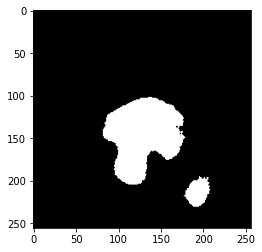

In [20]:
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(Segment_model_threshold_in, cmap="gray")

In [21]:
path_segment_in ="/media/beta/navchetan-beps/Lars_BEP/Test_outputs/MiniNet/Results_outer"
os.chdir(path_segment_in)
x = sio.loadmat('Segment_Output00004.mat')
Segment_model = x['S']
Segment_model1 = Segment_model*255;
retval1, Segment_model_threshold = cv2.threshold(Segment_model1,100,255,cv2.THRESH_BINARY)
Segment_model_threshold_out = Segment_model_threshold/255.0

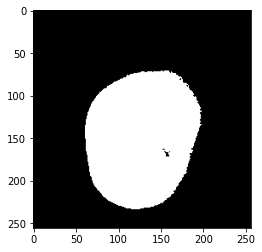

In [22]:
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(Segment_model_threshold_out, cmap="gray")

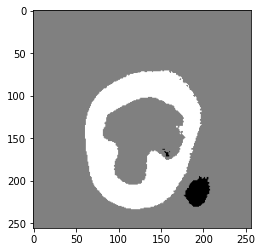

In [23]:
plt.imshow(Segment_model_threshold_out-Segment_model_threshold_in,cmap="gray")

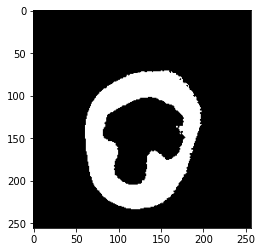

In [50]:
I1=Segment_model_threshold_out-Segment_model_threshold_in
for i in range(256):
    for j in range(256):
        if I1[i,j]<0:
            I1[i,j]=0
plt.imshow(I1,cmap="gray")

In [52]:
O1 = np.zeros((N_TESTING_SAMPLES,256,256))
O2 = np.zeros((N_TESTING_SAMPLES,256,256))
Ground_Truth_out = np.zeros((N_TESTING_SAMPLES,256,256))
Ground_Truth_in = np.zeros((N_TESTING_SAMPLES,256,256))
Ground_Truth = np.zeros((N_TESTING_SAMPLES,256,256))
Segmentation_from_model_out = np.zeros((N_TESTING_SAMPLES,256,256))
Segmentation_from_model_in = np.zeros((N_TESTING_SAMPLES,256,256))
Segmentation_from_model = np.zeros((N_TESTING_SAMPLES,256,256))
path = "/media/beta/navchetan-beps/Lars_BEP/Testing sets/Inputs"
os.chdir(path)
for i in range(N_TESTING_SAMPLES):
    if(i%10 == 0):
        print(i)
    pathr = 'Image'+str(i+1).zfill(5)+'.mat'
    x = sio.loadmat(pathr)
    O1[i,:,:] = x['U']/255
    O2[i,:,:] = x['U']/255
    
path = "/media/beta/navchetan-beps/Lars_BEP/Testing sets/Outer" #change directory
os.chdir(path)
for i in range(N_TESTING_SAMPLES):
    if(i%10 == 0):
        print(i)
    pathr = 'Segment'+str(i+1).zfill(5)+'.mat'
    x = sio.loadmat(pathr)
    Ground_Truth_out[i,:,:] = x['S']
    retval2, ground_truth_testing_threshold = cv2.threshold(Ground_Truth_out[i,:,:],0,255,cv2.THRESH_BINARY)
    Ground_Truth_out[i,:,:] = ground_truth_testing_threshold/255.0
    
path = "/media/beta/navchetan-beps/Lars_BEP/Test sets/Inner" #change directory
os.chdir(path)
for i in range(N_TESTING_SAMPLES):
    if(i%10 == 0):
        print(i)
    pathr = 'Segment'+str(i+1).zfill(5)+'.mat'
    x = sio.loadmat(pathr)
    Ground_Truth_in[i,:,:] = x['S']
    retval2, ground_truth_testing_threshold = cv2.threshold(Ground_Truth_in[i,:,:],0,255,cv2.THRESH_BINARY)
    Ground_Truth_in[i,:,:] = ground_truth_testing_threshold/255.0
    
for i in range(N_TESTING_SAMPLES):
    Ground_Truth[i,:,:]=Ground_Truth_out[i,:,:]-Ground_Truth_in[i,:,:]

path = "/media/beta/navchetan-beps/Lars_BEP/Test_outputs/MiniNet/Results_outer"
os.chdir(path)
for i in range(N_TESTING_SAMPLES):
    if(i%10 == 0):
        print(i)
    pathr = 'Segment_Output'+str(i+1).zfill(5)+'.mat'
    x = sio.loadmat(pathr)
    Segmentation_from_model_out[i,:,:] = x['S']
    Segment_model1 = Segmentation_from_model_out[i,:,:]*255;
    retval1, Segment_model_threshold = cv2.threshold(Segment_model1,100,255,cv2.THRESH_BINARY)
    Segmentation_from_model_out[i,:,:] = Segment_model_threshold/255.0
    
path = "/media/beta/navchetan-beps/Lars_BEP/Test_outputs/MiniNet/Results_inner"
os.chdir(path)
for i in range(N_TESTING_SAMPLES):
    if(i%10 == 0):
        print(i)
    pathr = 'Segment_Output'+str(i+1).zfill(5)+'.mat'
    x = sio.loadmat(pathr)
    Segmentation_from_model_in[i,:,:] = x['S']
    Segment_model1 = Segmentation_from_model_in[i,:,:]*255;
    retval1, Segment_model_threshold = cv2.threshold(Segment_model1,100,255,cv2.THRESH_BINARY)
    Segmentation_from_model_in[i,:,:] = Segment_model_threshold/255.0

for i in range(N_TESTING_SAMPLES):
    Segmentation_from_model[i,:,:]= Segmentation_from_model_out[i,:,:]-Segmentation_from_model_in[i,:,:]

def concat_images(imga, imgb):
    """
    Combines two color image ndarrays side-by-side.
    """
    [ha,wa] = np.shape(imga)
    [hb,wb] = np.shape(imgb)
    max_height = np.max([ha, hb])
    total_width = wa+wb
    new_img = np.zeros(shape=(max_height, total_width))
    new_img[:ha,:wa]=imga
    new_img[:hb,wa:wa+wb]=imgb
    return new_img


h = 256
w = 256
img_array = []    
for k in range(N_TESTING_SAMPLES):
    print(k)
    for i in range(h):
        for j in range (w):
            if Ground_Truth[k,i,j]>0:
                O1[k,i,j]=Ground_Truth[k,i,j]
            if Segmentation_from_model[k,i,j]>0:
                O2[k,i,j]=Segmentation_from_model[k,i,j]
    W1 = O1[k,:,:]
    W2 = O2[k,:,:]
    img = concat_images(W1,W2)
    img_array.append(img)
    
    path = "/media/beta/navchetan-beps/Lars_BEP/Test_outputs/MiniNet/Joint_out_in"
    os.chdir(path) 
    pathr = 'Joint_Image'+str(k+1).zfill(5)+'.png'
    cv2.imwrite(pathr, img*255) 

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
1